# Main Task with Bonus

Total parameters: 5,918,628
Trainable parameters: 5,918,628

Training with 70.0% training split


100%|██████████| 169M/169M [00:03<00:00, 43.5MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/50:
Training Loss: 11.6159, Accuracy: 5.21%, Severity: 2.6988
Validation Loss: 10.5350, Accuracy: 8.82%, Severity: 2.6264
Epoch 2/50:
Training Loss: 10.4444, Accuracy: 8.88%, Severity: 2.5970
Validation Loss: 9.4316, Accuracy: 13.31%, Severity: 2.4763
Epoch 3/50:
Training Loss: 9.7186, Accuracy: 11.59%, Severity: 2.5182
Validation Loss: 8.6981, Accuracy: 16.43%, Severity: 2.3847
Epoch 4/50:
Training Loss: 9.0414, Accuracy: 14.55%, Severity: 2.4397
Validation Loss: 7.8422, Accuracy: 21.39%, Severity: 2.2445
Epoch 5/50:
Training Loss: 8.4859, Accuracy: 16.68%, Severity: 2.3800
Validation Loss: 7.5362, Accuracy: 23.40%, Severity: 2.2060
Epoch 6/50:
Training Loss: 7.9251, Accuracy: 19.66%, Severity: 2.2932
Validation Loss: 6.9918, Accuracy: 26.03%, Severity: 2.1196
Epoch 7/50:
Training Loss: 7.4483, Accuracy: 22.44%, Severity: 2.2150
Validation Loss: 6.5800, Accuracy: 28.97%, Severity: 2.0349


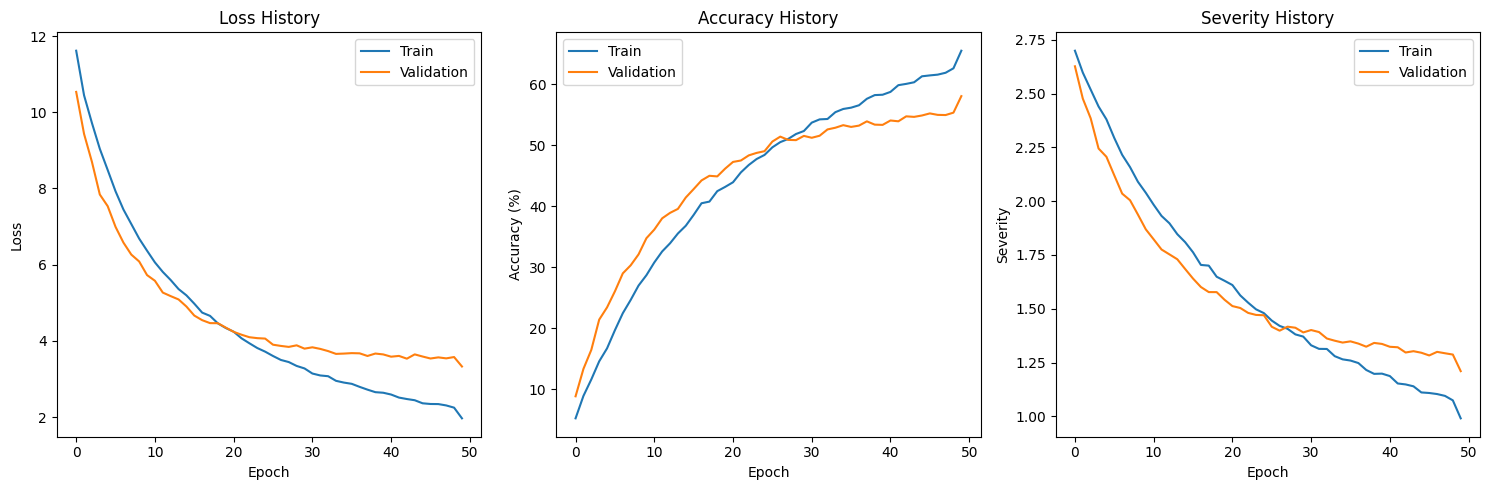


Test Set Results:
Accuracy: 59.77%
Average Severity: 1.1539


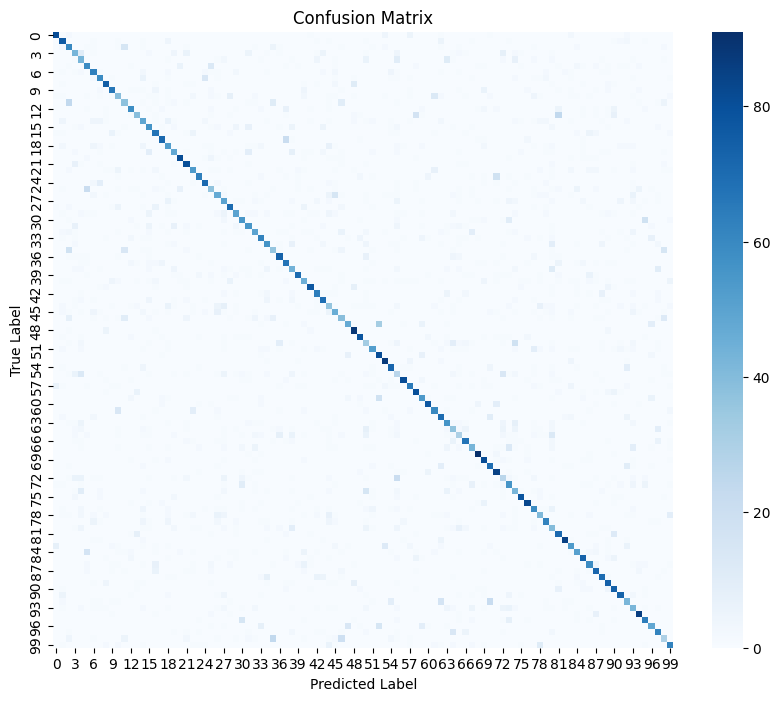


Training with 80.0% training split
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/50:
Training Loss: 2.8875, Accuracy: 57.96%, Severity: 1.2056
Validation Loss: 2.2501, Accuracy: 65.36%, Severity: 1.0076
Epoch 2/50:
Training Loss: 2.7532, Accuracy: 58.84%, Severity: 1.1821
Validation Loss: 2.2112, Accuracy: 65.63%, Severity: 0.9917
Epoch 3/50:
Training Loss: 2.6513, Accuracy: 59.91%, Severity: 1.1511
Validation Loss: 2.2020, Accuracy: 65.14%, Severity: 1.0119
Epoch 4/50:
Training Loss: 2.6137, Accuracy: 59.77%, Severity: 1.1531
Validation Loss: 2.2448, Accuracy: 65.02%, Severity: 1.0094
Epoch 5/50:
Training Loss: 2.5774, Accuracy: 59.92%, Severity: 1.1538
Validation Loss: 2.3954, Accuracy: 62.96%, Severity: 1.0663
Epoch 6/50:
Training Loss: 2.5317, Accuracy: 60.22%, Severity: 1.1421
Validation Loss: 2.3222, Accuracy: 64.34%, Severity: 1.0316
Epoch 7/50:
Training Loss: 2.4670, Accuracy: 60.99%, Severity: 1.1193
Validation Loss: 2.2853, Accuracy: 65.

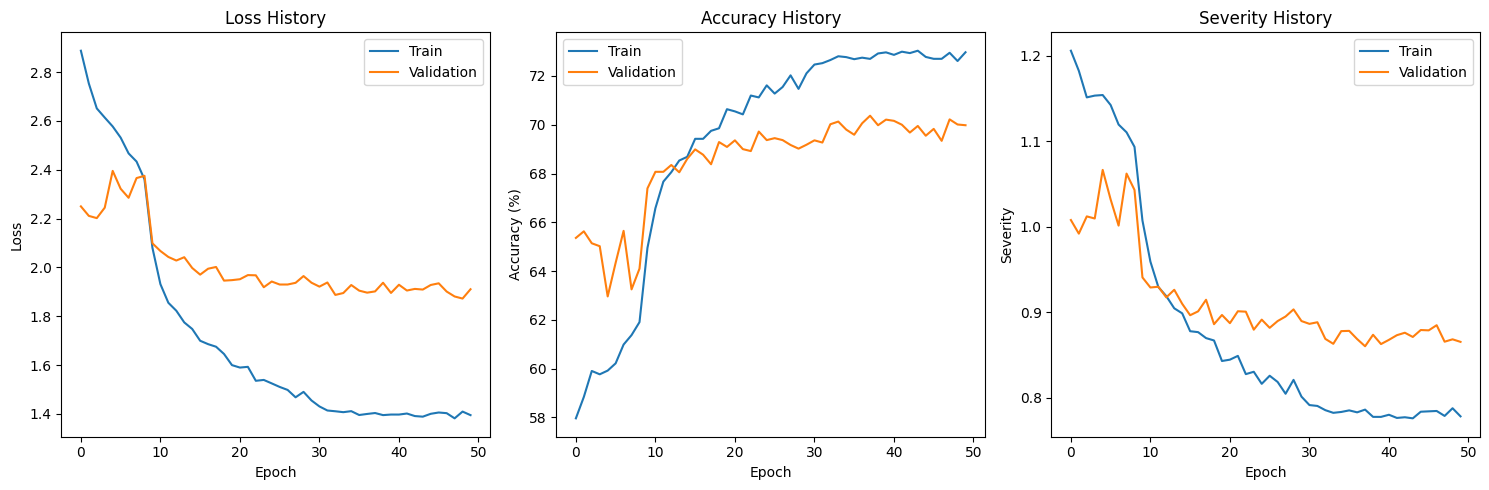


Test Set Results:
Accuracy: 62.72%
Average Severity: 1.0717


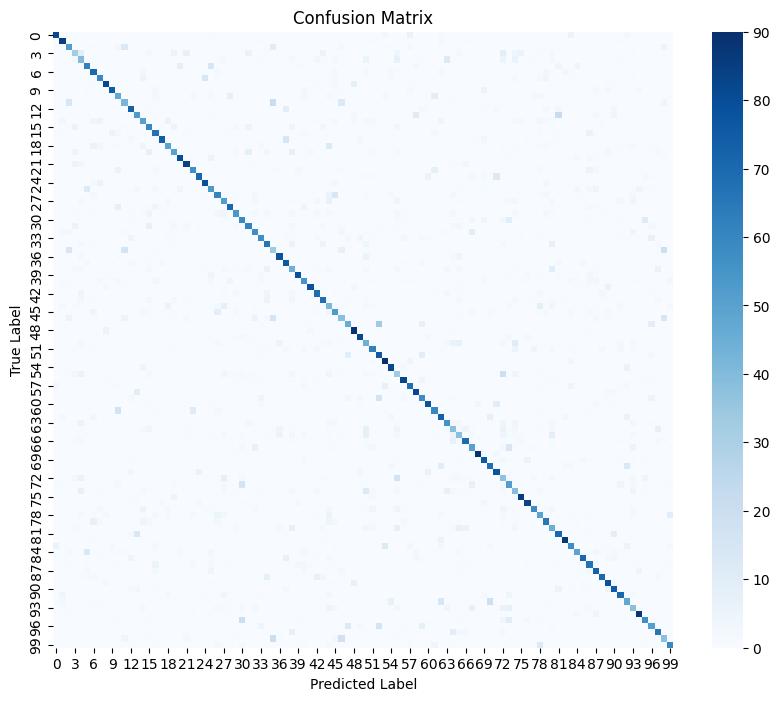


Training with 90.0% training split
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/50:
Training Loss: 2.2264, Accuracy: 63.75%, Severity: 1.0414
Validation Loss: 1.6697, Accuracy: 70.34%, Severity: 0.8682
Epoch 2/50:
Training Loss: 2.2529, Accuracy: 63.22%, Severity: 1.0572
Validation Loss: 1.7679, Accuracy: 69.88%, Severity: 0.8742
Epoch 3/50:
Training Loss: 2.2856, Accuracy: 62.57%, Severity: 1.0767
Validation Loss: 1.8296, Accuracy: 67.90%, Severity: 0.9350
Epoch 4/50:
Training Loss: 2.2206, Accuracy: 63.28%, Severity: 1.0566
Validation Loss: 1.9601, Accuracy: 67.54%, Severity: 0.9520
Epoch 5/50:
Training Loss: 2.2069, Accuracy: 63.51%, Severity: 1.0478
Validation Loss: 1.9265, Accuracy: 68.26%, Severity: 0.9240
Epoch 6/50:
Training Loss: 2.1993, Accuracy: 63.72%, Severity: 1.0420
Validation Loss: 2.1272, Accuracy: 65.96%, Severity: 1.0023
Epoch 7/50:
Training Loss: 2.1742, Accuracy: 63.65%, Severity: 1.0429
Validation Loss: 1.8983, Accuracy: 68.

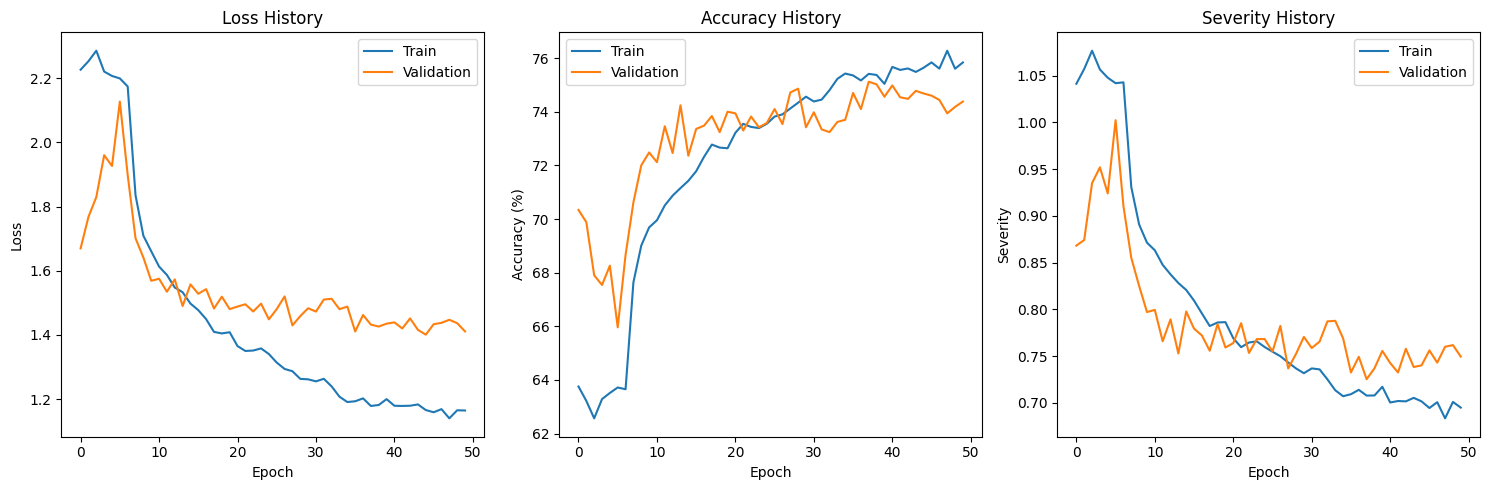


Test Set Results:
Accuracy: 63.84%
Average Severity: 1.0360


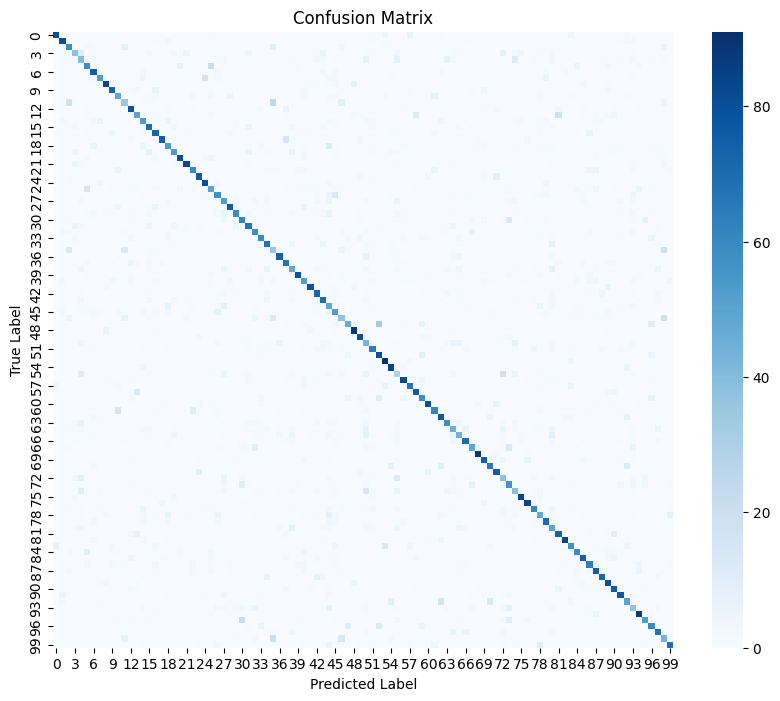

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the mappings
CIFAR100_SUPERCLASS_MAPPING = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# Create class to superclass mapping
CLASS_TO_SUPERCLASS = {}
for super_idx, (superclass, classes) in enumerate(CIFAR100_SUPERCLASS_MAPPING.items()):
    for class_name in classes:
        CLASS_TO_SUPERCLASS[class_name] = super_idx

# Create superclass to group mapping
SUPERCLASS_TO_GROUP = {
    'flowers': 0, 'trees': 0, 'fruit and vegetables': 0,  # Plants/Parts of plants
    'vehicles 1': 1, 'vehicles 2': 1,  # Vehicles
    'non-insect invertebrates': 2, 'insects': 2,  # Invertebrates
    'fish': 3, 'aquatic mammals': 3,  # Aquatic animals
    'large carnivores': 4, 'large omnivores and herbivores': 4,  # Large animals
    'food containers': 5, 'household electrical devices': 5,
    'household furniture': 5, 'large man-made outdoor things': 5,  # Man-made articles
    'people': 6,  # People
    'reptiles': 7, 'medium-sized mammals': 7, 'small mammals': 7,  # Normal Terrestrial Animals
    'large natural outdoor scenes': 8  # Outdoor scenes
}

class SeverityAwareLoss(nn.Module):
    def __init__(self, num_classes=100, device='cuda'):
        super().__init__()
        self.num_classes = num_classes
        self.device = device

        # Create severity matrix
        self.severity_matrix = self._create_severity_matrix()

    def _create_severity_matrix(self):
        # Create a matrix of size (num_classes, num_classes) containing severity scores
        severity = torch.zeros((self.num_classes, self.num_classes), device=self.device)

        # For each pair of classes, calculate severity
        for i in range(self.num_classes):
            for j in range(self.num_classes):
                if i == j:
                    severity[i, j] = 0
                else:
                    # Get superclass and group info for both classes
                    class_i_super = CLASS_TO_SUPERCLASS[CIFAR100_SUPERCLASS_MAPPING[list(CIFAR100_SUPERCLASS_MAPPING.keys())[i//5]][i%5]]
                    class_j_super = CLASS_TO_SUPERCLASS[CIFAR100_SUPERCLASS_MAPPING[list(CIFAR100_SUPERCLASS_MAPPING.keys())[j//5]][j%5]]

                    group_i = SUPERCLASS_TO_GROUP[list(CIFAR100_SUPERCLASS_MAPPING.keys())[class_i_super]]
                    group_j = SUPERCLASS_TO_GROUP[list(CIFAR100_SUPERCLASS_MAPPING.keys())[class_j_super]]

                    # Assign severity based on hierarchy
                    if class_i_super == class_j_super:
                        severity[i, j] = 1  # Same superclass
                    elif group_i == group_j:
                        severity[i, j] = 2  # Same group, different superclass
                    else:
                        severity[i, j] = 3  # Different group

        return severity

    def forward(self, outputs, targets):
        # Standard cross-entropy loss
        ce_loss = nn.functional.cross_entropy(outputs, targets, reduction='none')

        # Get predicted classes
        _, preds = torch.max(outputs, 1)

        # Get severity weights for the predictions
        severity_weights = self.severity_matrix[targets, preds]

        # Weight the cross-entropy loss by severity
        weighted_loss = ce_loss * severity_weights

        return weighted_loss.mean()

class SeverityAwareCNN(nn.Module):
    def __init__(self):
        super().__init__()

        # Feature extractor
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.AdaptiveAvgPool2d((4, 4))
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 100)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# [Previous imports and class definitions remain the same until SeverityAwareTrainer class]

class SeverityAwareTrainer:
    # [Previous __init__ method remains the same]
    def __init__(self, model, device, train_split=0.8):
        self.model = model
        self.device = device
        self.train_split = train_split

        # Data augmentation and normalization
        transform_train = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
        ])

        transform_test = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
        ])

        # Load CIFAR100
        self.train_dataset = torchvision.datasets.CIFAR100(
            root='./data', train=True, download=True, transform=transform_train)
        self.test_dataset = torchvision.datasets.CIFAR100(
            root='./data', train=False, download=True, transform=transform_test)

        # Split training data
        train_size = int(len(self.train_dataset) * self.train_split)
        val_size = len(self.train_dataset) - train_size
        self.train_data, self.val_data = random_split(
            self.train_dataset, [train_size, val_size])

        # Initialize severity-aware loss
        self.criterion = SeverityAwareLoss(num_classes=100, device=device)

    def train(self, num_epochs=100, batch_size=128, lr=0.001):
        train_loader = DataLoader(self.train_data, batch_size=batch_size,
                                shuffle=True, num_workers=2)
        val_loader = DataLoader(self.val_data, batch_size=batch_size,
                              shuffle=False, num_workers=2)

        optimizer = optim.Adam(self.model.parameters(), lr=lr)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

        best_val_loss = float('inf')
        history = {
            'train_loss': [], 'val_loss': [],
            'train_severity': [], 'val_severity': [],
            'train_acc': [], 'val_acc': []  # Added accuracy tracking
        }

        for epoch in range(num_epochs):
            # Training phase
            self.model.train()
            train_loss = 0.0
            train_severity = 0.0
            train_correct = 0
            train_total = 0

            for inputs, targets in train_loader:
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                optimizer.zero_grad()
                outputs = self.model(inputs)

                loss = self.criterion(outputs, targets)
                loss.backward()
                optimizer.step()

                train_loss += loss.item()

                # Calculate accuracy
                _, preds = torch.max(outputs, 1)
                train_correct += (preds == targets).sum().item()
                train_total += targets.size(0)

                # Calculate average severity
                severity = self.criterion.severity_matrix[targets, preds].mean().item()
                train_severity += severity

            # Validation phase
            self.model.eval()
            val_loss = 0.0
            val_severity = 0.0
            val_correct = 0
            val_total = 0

            with torch.no_grad():
                for inputs, targets in val_loader:
                    inputs, targets = inputs.to(self.device), targets.to(self.device)
                    outputs = self.model(inputs)

                    loss = self.criterion(outputs, targets)
                    val_loss += loss.item()

                    # Calculate accuracy
                    _, preds = torch.max(outputs, 1)
                    val_correct += (preds == targets).sum().item()
                    val_total += targets.size(0)

                    # Calculate average severity
                    severity = self.criterion.severity_matrix[targets, preds].mean().item()
                    val_severity += severity

            # Calculate epoch metrics
            train_loss /= len(train_loader)
            val_loss /= len(val_loader)
            train_severity /= len(train_loader)
            val_severity /= len(val_loader)
            train_acc = 100 * train_correct / train_total
            val_acc = 100 * val_correct / val_total

            # Update history
            history['train_loss'].append(train_loss)
            history['val_loss'].append(val_loss)
            history['train_severity'].append(train_severity)
            history['val_severity'].append(val_severity)
            history['train_acc'].append(train_acc)
            history['val_acc'].append(val_acc)

            # Print statistics
            print(f'Epoch {epoch+1}/{num_epochs}:')
            print(f'Training Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%, Severity: {train_severity:.4f}')
            print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.2f}%, Severity: {val_severity:.4f}')

            # Learning rate scheduling
            scheduler.step(val_loss)

            # Save best model
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(self.model.state_dict(), 'best_severity_aware_model.pth')

        return history

    def evaluate(self, split='test'):
        self.model.eval()
        dataset = self.test_dataset if split == 'test' else self.val_data
        loader = DataLoader(dataset, batch_size=128, shuffle=False, num_workers=2)

        all_preds = []
        all_targets = []
        total_severity = 0.0

        with torch.no_grad():
            for inputs, targets in loader:
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.model(inputs)

                _, preds = torch.max(outputs, 1)
                severity = self.criterion.severity_matrix[targets, preds].mean().item()
                total_severity += severity

                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

        # Calculate metrics
        cm = confusion_matrix(all_targets, all_preds)
        accuracy = (np.array(all_preds) == np.array(all_targets)).mean() * 100
        avg_severity = total_severity / len(loader)

        return {
            'accuracy': accuracy,
            'average_severity': avg_severity,
            'confusion_matrix': cm
        }

# Updated usage example
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = SeverityAwareCNN().to(device)

    # Print model summary
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")

    # Train with different splits
    for split in [0.7, 0.8, 0.9]:
        print(f"\nTraining with {split*100}% training split")
        trainer = SeverityAwareTrainer(model, device, train_split=split)
        history = trainer.train(num_epochs=50)

        # Plot training history
        plt.figure(figsize=(15, 5))

        # Plot loss
        plt.subplot(1, 3, 1)
        plt.plot(history['train_loss'], label='Train')
        plt.plot(history['val_loss'], label='Validation')
        plt.title('Loss History')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Plot accuracy
        plt.subplot(1, 3, 2)
        plt.plot(history['train_acc'], label='Train')
        plt.plot(history['val_acc'], label='Validation')
        plt.title('Accuracy History')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()

        # Plot severity
        plt.subplot(1, 3, 3)
        plt.plot(history['train_severity'], label='Train')
        plt.plot(history['val_severity'], label='Validation')
        plt.title('Severity History')
        plt.xlabel('Epoch')
        plt.ylabel('Severity')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Evaluate
        results = trainer.evaluate('test')
        print("\nTest Set Results:")
        print(f"Accuracy: {results['accuracy']:.2f}%")
        print(f"Average Severity: {results['average_severity']:.4f}")

        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(results['confusion_matrix'], annot=False, cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

# Task without Bonus

In [ ]:
# The class confusion matrix is very cluttered in the below code, For the 100-class confusion matrix
# Only shows non-zero values to reduce clutter
# Removes axis labels for better visibility
# Uses a mask to hide zero values
# Maintains the overall pattern visibility


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the mappings
CIFAR100_SUPERCLASS_MAPPING = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# Create class to superclass mapping
CLASS_TO_SUPERCLASS = {}
for super_idx, (superclass, classes) in enumerate(CIFAR100_SUPERCLASS_MAPPING.items()):
    for class_name in classes:
        CLASS_TO_SUPERCLASS[class_name] = super_idx

# Create superclass to group mapping
SUPERCLASS_TO_GROUP = {
    'flowers': 0, 'trees': 0, 'fruit and vegetables': 0,  # Plants/Parts of plants
    'vehicles 1': 1, 'vehicles 2': 1,  # Vehicles
    'non-insect invertebrates': 2, 'insects': 2,  # Invertebrates
    'fish': 3, 'aquatic mammals': 3,  # Aquatic animals
    'large carnivores': 4, 'large omnivores and herbivores': 4,  # Large animals
    'food containers': 5, 'household electrical devices': 5,
    'household furniture': 5, 'large man-made outdoor things': 5,  # Man-made articles
    'people': 6,  # People
    'reptiles': 7, 'medium-sized mammals': 7, 'small mammals': 7,  # Normal Terrestrial Animals
    'large natural outdoor scenes': 8  # Outdoor scenes
}

class MultiHeadCNN(nn.Module):
    def __init__(self):
        super(MultiHeadCNN, self).__init__()

        # Base feature extractor
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.AdaptiveAvgPool2d((4, 4))
        )

        # Shared fully connected layers
        self.shared_fc = nn.Sequential(
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5)
        )

        # Classification heads
        self.class_head = nn.Linear(512, 100)
        self.superclass_head = nn.Linear(512, 20)
        self.group_head = nn.Linear(512, 9)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.shared_fc(x)

        return {
            'class': self.class_head(x),
            'superclass': self.superclass_head(x),
            'group': self.group_head(x)
        }

class CIFAR100WithMappings(torchvision.datasets.CIFAR100):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super().__init__(root, train=train, transform=transform,
                        target_transform=target_transform, download=download)

        # Create mapping arrays
        self.class_to_superclass = torch.tensor([CLASS_TO_SUPERCLASS[self.classes[i]]
                                               for i in range(100)])

        # Create mapping from superclass name to group
        superclass_names = list(CIFAR100_SUPERCLASS_MAPPING.keys())
        self.superclass_to_group = torch.tensor([SUPERCLASS_TO_GROUP[name]
                                               for name in superclass_names])

    def __getitem__(self, index):
        img, class_target = super().__getitem__(index)

        # Get superclass and group targets
        superclass_target = self.class_to_superclass[class_target]
        group_target = self.superclass_to_group[superclass_target]

        return img, {
            'class': class_target,
            'superclass': superclass_target,
            'group': group_target
        }

class Trainer:
    def __init__(self, model, device, train_split=0.8):
        self.model = model
        self.device = device
        self.train_split = train_split

        # Data augmentation and normalization
        transform_train = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
        ])

        transform_test = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
        ])

        # Load datasets with mappings
        self.train_dataset = CIFAR100WithMappings(
            root='./data', train=True, download=True, transform=transform_train)
        self.test_dataset = CIFAR100WithMappings(
            root='./data', train=False, download=True, transform=transform_test)

        # Split training data
        train_size = int(len(self.train_dataset) * self.train_split)
        val_size = len(self.train_dataset) - train_size
        self.train_data, self.val_data = random_split(
            self.train_dataset, [train_size, val_size])

    def train(self, num_epochs=100, batch_size=128, lr=0.001):
        train_loader = DataLoader(self.train_data, batch_size=batch_size,
                                shuffle=True, num_workers=2)
        val_loader = DataLoader(self.val_data, batch_size=batch_size,
                              shuffle=False, num_workers=2)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=lr)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

        best_val_loss = float('inf')

        for epoch in range(num_epochs):
            # Training phase
            self.model.train()
            train_loss = 0.0
            for inputs, targets in train_loader:
                inputs = inputs.to(self.device)
                targets = {k: v.to(self.device) for k, v in targets.items()}

                optimizer.zero_grad()
                outputs = self.model(inputs)

                # Calculate loss for each head
                loss = sum(criterion(outputs[k], targets[k]) for k in outputs.keys())
                loss.backward()
                optimizer.step()

                train_loss += loss.item()

            # Validation phase
            self.model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for inputs, targets in val_loader:
                    inputs = inputs.to(self.device)
                    targets = {k: v.to(self.device) for k, v in targets.items()}
                    outputs = self.model(inputs)

                    loss = sum(criterion(outputs[k], targets[k]) for k in outputs.keys())
                    val_loss += loss.item()

            # Print statistics
            print(f'Epoch {epoch+1}/{num_epochs}:')
            print(f'Training Loss: {train_loss/len(train_loader):.4f}')
            print(f'Validation Loss: {val_loss/len(val_loader):.4f}')

            # Learning rate scheduling
            scheduler.step(val_loss)

            # Save best model
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(self.model.state_dict(), 'best_model.pth')

    def evaluate(self, split='test'):
            self.model.eval()
            if split == 'test':
                dataset = self.test_dataset
            elif split == 'val':
                dataset = self.val_data
            elif split == 'train':
                dataset = self.train_data
            else:
                raise ValueError(f"Invalid split: {split}. Choose 'train', 'val', or 'test'.")

            loader = DataLoader(dataset, batch_size=128, shuffle=False, num_workers=2)

            correct = {'class': 0, 'superclass': 0, 'group': 0}
            total = 0

            all_preds = {'class': [], 'superclass': [], 'group': []}
            all_targets = {'class': [], 'superclass': [], 'group': []}

            with torch.no_grad():
                for inputs, targets in loader:
                    inputs = inputs.to(self.device)
                    targets = {k: v.to(self.device) for k, v in targets.items()}
                    outputs = self.model(inputs)

                    for k in outputs.keys():
                        _, preds = torch.max(outputs[k].data, 1)
                        correct[k] += (preds == targets[k]).sum().item()
                        all_preds[k].extend(preds.cpu().numpy())
                        all_targets[k].extend(targets[k].cpu().numpy())

                    total += inputs.size(0)

            accuracies = {k: 100 * v / total for k, v in correct.items()}
            cms = {k: confusion_matrix(all_targets[k], all_preds[k]) for k in outputs.keys()}

            return accuracies, cms

# Update the main block to evaluate training and testing accuracy
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MultiHeadCNN().to(device)

    # Print model summary
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")

    # Train and evaluate with different splits
    for split in [0.7, 0.8, 0.9]:
        print(f"\nTraining with {split*100}% training split")
        trainer = Trainer(model, device, train_split=split)
        trainer.train(num_epochs=50)

        # Evaluate on training and test sets
        train_accuracies, _ = trainer.evaluate('train')
        test_accuracies, _ = trainer.evaluate('test')

        print("\nTraining Set Results:")
        for k, v in train_accuracies.items():
            print(f"{k.capitalize()} Accuracy: {v:.2f}%")

        print("\nTest Set Results:")
        for k, v in test_accuracies.items():
            print(f"{k.capitalize()} Accuracy: {v:.2f}%")


        # # Plot confusion matrices
        # for k, cm in cms.items():
        #     if k == 'class':
        #         plt.figure(figsize=(25, 20))
        #         # Get dataset and class to superclass mapping
        #         dataset = trainer.test_dataset
        #         class_to_superclass = dataset.class_to_superclass.numpy()
        #         # Sort indices by superclass
        #         sorted_indices = np.argsort(class_to_superclass)
        #         sorted_cm = cm[sorted_indices][:, sorted_indices]
        #         # Find superclass boundaries
        #         superclasses_sorted = class_to_superclass[sorted_indices]
        #         boundaries = np.where(superclasses_sorted[:-1] != superclasses_sorted[1:])[0] + 1
        #         # Plot sorted confusion matrix
        #         sns.heatmap(sorted_cm, annot=False, fmt='d', cmap='Blues',
        #                     xticklabels=False, yticklabels=False, cbar_kws={'shrink': 0.7})
        #         # Add red lines for superclass boundaries
        #         for b in boundaries:
        #             plt.axvline(x=b, color='red', linewidth=1, linestyle='--')
        #             plt.axhline(y=b, color='red', linewidth=1, linestyle='--')
        #         plt.title('Class Confusion Matrix (Grouped by Superclass)', fontsize=14)
        #         plt.xlabel('Predicted Class', fontsize=12)
        #         plt.ylabel('True Class', fontsize=12)
        #     else:
        #         plt.figure(figsize=(10, 8))
        #         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        #         plt.title(f'{k.capitalize()} Confusion Matrix')
        #     plt.tight_layout()
        #     plt.show()